# Problem 1

In [4]:
#Import Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib qt

import os

In [5]:
#Load Datasets

# -1 should be treated as NULL, as per the problem statement.
train = pd.read_csv('train.csv',delimiter=",", index_col=None, na_values='-1')
test = pd.read_csv('test.csv',delimiter=",", index_col=None, na_values='-1')

#Shape of the dataset
print 'Train data shape: ', train.shape
print 'Test data shape: ', test.shape

Train data shape:  (347841, 33)
Test data shape:  (86961, 32)


In [6]:
train.head()

,unique_id,metric1,metric2,metric6,metric3,metric4,metric5,binary_var1,region,sourceMedium,...,page4_top,page4_exits,visited_page4,page5_top,page5_exits,visited_page5,page6_top,page6_exits,visited_page6,target
0,1,4,1,2,5.0,5.0,0.0,0,84e516108956e6e374941043b5f73e86,d3d55c19deb05c118cfed68910a1f6bd,...,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0
1,2,0,1,1,0.0,0.0,100.0,0,185a5eb309e9ba14f65e6486f08b3032,3a987a7bb0a840a40d80e301132f138c,...,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0
2,3,0,1,6,37.2,186.0,0.0,1,84e516108956e6e374941043b5f73e86,d3d55c19deb05c118cfed68910a1f6bd,...,0.0,NaN,0,0.0,NaN,0,30.0,0.0,1,0
3,4,24,1,1,0.0,0.0,100.0,0,185a5eb309e9ba14f65e6486f08b3032,335cceef7d447b13ae8fc7c0e0a7e826,...,0.0,NaN,0,0.0,NaN,0,0.0,1.0,1,0
4,5,0,1,1,0.0,4.0,0.0,0,3a2d6295a828fc1ec5084af382b61e35,335cceef7d447b13ae8fc7c0e0a7e826,...,0.0,NaN,0,0.0,NaN,0,0.0,NaN,0,0


## Checking NULL values

In [7]:
# Column wise Nulls

null_columns=train.columns[train.isnull().any()]
null_ = train[null_columns].isnull().sum()
train_w_null_cols = (null_/train.shape[0])*100 
print train_w_null_cols

page1_exits    98.505927
page2_exits    99.989363
page3_exits    91.757153
page4_exits    98.269324
page5_exits    99.808533
page6_exits    55.573380
dtype: float64


In [8]:
## All the above columns has more than "50%" of its value as Null, 
## So there is not much information avaialble to explain 'target'

#### Removing those columns:
drop_col = train_w_null_cols.index.tolist()
train.drop(drop_col, axis = 1, inplace=True)
print 'Train size after dropping columns: ', train.shape

Train size after dropping columns:  (347841, 27)


In [7]:
# Row wise Nulls

def num_missing(x):
    return sum(x.isnull())

train_row = train.apply(num_missing, axis=1) #axis=1 defines that function is to be applied on each row

df1 = pd.DataFrame(index=train_row.index)
df1['value'] = train_row

threshold = np.round(train.shape[1] * 0.20)

df2 = df1[df1.value > threshold]
null_row_index = df2.index
print "No.of rows with % of Nulls > threshold are: ", len(df2)

No.of rows with % of Nulls > threshold are:  0


There won't be any rows with NULLS because we have removed all the columns with Nulls(all of them exceeded 50%)

In [9]:
# Check Datatypes column wise
train.ftypes

unique_id          int64:dense
metric1            int64:dense
metric2            int64:dense
metric6            int64:dense
metric3          float64:dense
metric4          float64:dense
metric5          float64:dense
binary_var1        int64:dense
region            object:dense
sourceMedium      object:dense
device            object:dense
country           object:dense
dayHourMinute      int64:dense
binary_var2        int64:dense
page1_top        float64:dense
visited_page1      int64:dense
page2_top        float64:dense
visited_page2      int64:dense
page3_top        float64:dense
visited_page3      int64:dense
page4_top        float64:dense
visited_page4      int64:dense
page5_top        float64:dense
visited_page5      int64:dense
page6_top        float64:dense
visited_page6      int64:dense
target             int64:dense
dtype: object

In [10]:
## Check for class imabalance in target
train.target.value_counts()

0    316036
1     31805
Name: target, dtype: int64

Since the no.of samples with target==0 is 10xtimes of that with target==0, 
Clearly there is CLASS IMBALANCE

In [11]:
# Page1_Visited means whether unique id has visited the page or not => categorical
for col in ['visited_page1', 'visited_page2', 'visited_page3',  'visited_page4', 'visited_page5', 'visited_page6']:
    train[col] = train[col].astype('category')

# Binary_Var contains binary values
for col in ['binary_var1', 'binary_var2']:
    train[col] = train[col].astype('category')

# region/sourceMedium/country/device are also treated categorical
for col in ['region', 'sourceMedium', 'device', 'country']:
    train[col] = train[col].astype('category')

train['target'] = train['target'].astype('category')

In [54]:
X.dtypes

binary_var1      category
binary_var2      category
country          category
dayHourMinute       int64
device           category
metric1             int64
metric2             int64
metric3           float64
metric4           float64
metric5           float64
metric6             int64
page1_top         float64
page2_top         float64
page3_top         float64
page4_top         float64
page5_top         float64
page6_top         float64
region           category
sourceMedium     category
unique_id           int64
visited_page1    category
visited_page2    category
visited_page3    category
visited_page4    category
visited_page5    category
visited_page6    category
dtype: object

In [14]:
import scipy.stats as scs

## Chi-square analysis on all categorical variables w.r.t target variable:
cat_cols = ['visited_page1', 'visited_page2', 'visited_page3',  'visited_page4', 'visited_page5', 'visited_page6',
            'binary_var1', 'binary_var2', 'region', 'sourceMedium', 'device', 'country']
print '*==Chi2 analysis wrt target==*'

rec_ = []
for col in cat_cols:
    chi2 = scs.chi2_contingency(pd.crosstab(index=train[col],columns=train['target']))
    rec = chi2[0:3]
    rec_.append(rec)
    
rec_tab = pd.DataFrame(rec_, columns = ['chi2_statistic', 'p_value', 'degrees_of_freedom'])
rec_tab.index = cat_cols
rec_tab

*==Chi2 analysis wrt target==*


,chi2_statistic,p_value,degrees_of_freedom
visited_page1,413.413665,6.623182e-92,1
visited_page2,0.004445,9.468411e-01,1
visited_page3,4976.188142,0.000000e+00,1
visited_page4,51.478897,7.237086e-13,1
visited_page5,18.087204,2.110148e-05,1
visited_page6,1216.158657,1.877550e-266,1
binary_var1,17808.556720,0.000000e+00,1
binary_var2,39757.633605,0.000000e+00,1
region,15094.784886,0.000000e+00,562
sourceMedium,46616.356384,0.000000e+00,461


Null Hypothesis: each categorical column is associated with target variable.

But, as per the test, 

Sine p-value is a probability that measures the evidence against the null hypothesis. Lower probabilities provide stronger evidence 'against' the null hypothesis.

Except visited_page2 (with p greater than 0.05, significance), rest all has some information associated with target variable. let's keep this noted!

In [28]:
# working with numerical columns to see if there is any relation

#excluding dayhourminute column for now
num_cols = ['metric1', 'metric2', 'metric3', 'metric4', 'metric5','metric6', 'page1_top', 'page2_top', 'page3_top', 'page4_top',
           'page5_top', 'page6_top']

num_data = train[num_cols]

In [82]:
## Correlation between all numeric column variables
num_data.corr()

,metric1,metric2,metric3,metric4,metric5,metric6,page1_top,page2_top,page3_top,page4_top,page5_top,page6_top
metric1,1.000000,-0.008537,0.009634,0.004209,-0.031370,-0.015225,0.001031,-0.000667,0.004716,0.001086,0.002267,0.013038
metric2,-0.008537,1.000000,0.155708,0.166962,-0.098065,0.474780,0.031139,0.017599,0.084436,0.026918,0.013206,0.163855
metric3,0.009634,0.155708,1.000000,0.523589,-0.347091,0.122781,0.059809,0.006426,0.154935,0.048063,0.017685,0.465361
metric4,0.004209,0.166962,0.523589,1.000000,-0.377635,0.505131,0.072670,0.010511,0.187027,0.068701,0.035177,0.371861
metric5,-0.031370,-0.098065,-0.347091,-0.377635,1.000000,-0.297294,-0.034220,-0.003459,-0.091830,-0.040796,-0.012791,-0.228760
metric6,-0.015225,0.474780,0.122781,0.505131,-0.297294,1.000000,0.044048,0.018550,0.100708,0.043128,0.021154,0.167633
page1_top,0.001031,0.031139,0.059809,0.072670,-0.034220,0.044048,1.000000,0.012238,0.043315,0.046827,0.020456,0.014232
page2_top,-0.000667,0.017599,0.006426,0.010511,-0.003459,0.018550,0.012238,1.000000,0.025778,0.001379,-0.000094,0.005923
page3_top,0.004716,0.084436,0.154935,0.187027,-0.091830,0.100708,0.043315,0.025778,1.000000,0.042171,0.014336,0.047500
page4_top,0.001086,0.026918,0.048063,0.068701,-0.040796,0.043128,0.046827,0.001379,0.042171,1.000000,0.017078,0.018260


None of the numeric variables are highly correlated(i.e., close to +/-1). Bivariate analysis might give us some information regarding the numeric variables.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc442425c90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fc441e5cb50>]], dtype=object)

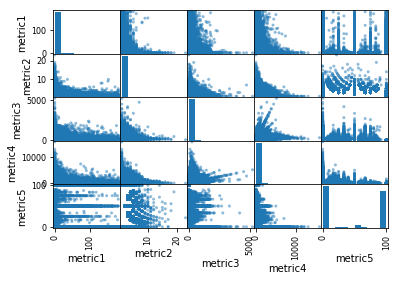

In [18]:
# Scatter plot between all the metric variables

pd.plotting.scatter_matrix(num_data[num_cols[0:5]])

The plots between a few variables, like metric5 w.r.t all other metrics seems to be in a different & very complex shape.

metric1 compared to 2,3,4 have almost the same shape with a little variation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc441d99e90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fc43bab7450>]], dtype=object)

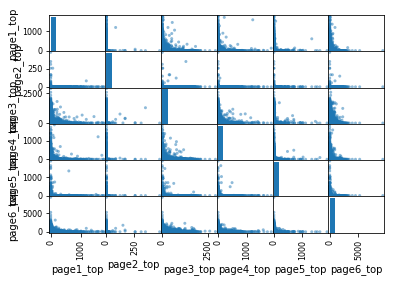

In [19]:
# Scatter plot between all the page_top variables
pd.plotting.scatter_matrix(num_data[num_cols[5:]])

Relation within all the page_top variales are almost the same

In [31]:
import matplotlib.pyplot as plt

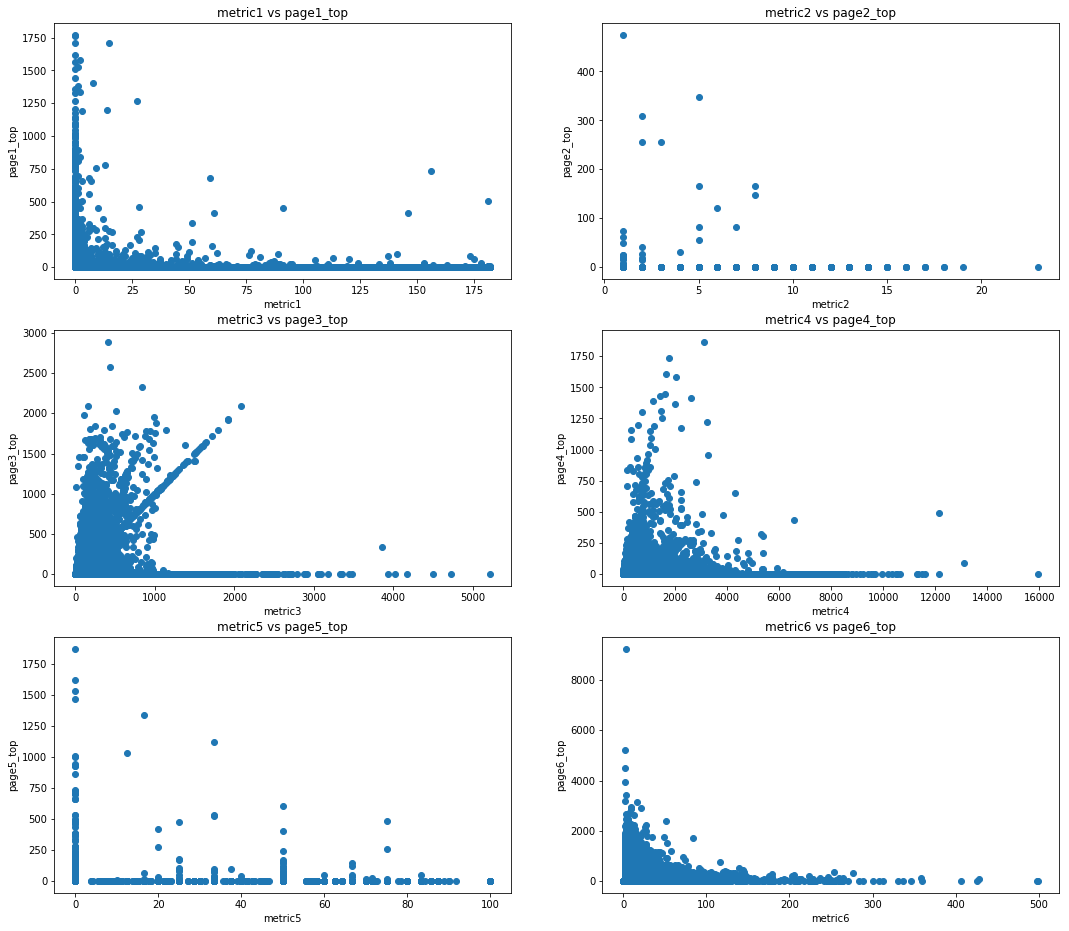

In [39]:
# Scatter plot between 'metric and its respective page_top' variables

plt.figure(figsize=(18,16))
plt.subplot(3,2,1)
plt.title('metric1 vs page1_top')
plt.xlabel('metric1')
plt.ylabel('page1_top')
plt.scatter(num_data['metric1'],num_data['page1_top'])
plt.subplot(3,2,2)
plt.title('metric2 vs page2_top')
plt.xlabel('metric2')
plt.ylabel('page2_top')
plt.scatter(num_data['metric2'],num_data['page2_top'])
plt.subplot(3,2,3)
plt.title('metric3 vs page3_top')
plt.xlabel('metric3')
plt.ylabel('page3_top')
plt.scatter(num_data['metric3'],num_data['page3_top'])
plt.subplot(3,2,4)
plt.title('metric4 vs page4_top')
plt.xlabel('metric4')
plt.ylabel('page4_top')
plt.scatter(num_data['metric4'],num_data['page4_top'])
plt.subplot(3,2,5)
plt.title('metric5 vs page5_top')
plt.xlabel('metric5')
plt.ylabel('page5_top')
plt.scatter(num_data['metric5'],num_data['page5_top'])
plt.subplot(3,2,6)
plt.title('metric6 vs page6_top')
plt.xlabel('metric6')
plt.ylabel('page6_top')
plt.scatter(num_data['metric6'],num_data['page6_top'])

Seems like relation between 

    1. metric1 vs page1_top is very much inversely proportional, so using any of those variables should be fine.
    2. metric6 vs page6_top is much inversely proportional, so using any of those variables should be fine.
    3. metric2 vs page2_top & metric5 vs page5_top: doesn't seem to have much relation, but bucketing metric5 w.r.t page5_top and similary for metric2 and page2_top would work
    4. for the rest of the combinations most of the data seems scattered across, so lets use all of them in predicting the target

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


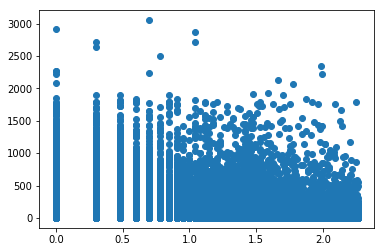

In [41]:
plt.scatter(np.log10(num_data['metric1']), num_data['metric3'])

In [44]:
metric1_inv = np.divide(np.ones_like(num_data['metric1'])*1.0, num_data['metric1'])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in divide
  """Entry point for launching an IPython kernel.


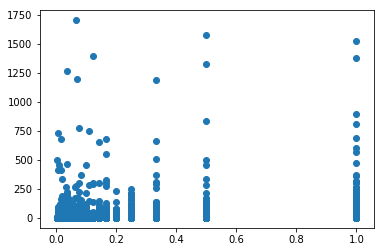

In [45]:
plt.scatter(metric1_inv, num_data['page1_top'])

In [47]:
len(metric1_inv.unique())

183

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

In [69]:
def evaluate_model(target_true,target_predicted):
    print "Confusion Matrix: \n", confusion_matrix(target_true,target_predicted)
    print "\nClassification Report: \n",classification_report(target_true,target_predicted)
    print "\nThe Accuracy score is {:.2%}".format(accuracy_score(target_true,target_predicted))
    print "\nAUC_ROC Score is {:.2%}".format(roc_auc_score(target_true,target_predicted))

In [83]:
train['metric1_inv'] = np.divide(np.ones_like(train['metric1'])*1.0, train['metric1'])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in divide
  """Entry point for launching an IPython kernel.


In [84]:
# Splitting the training data to train and validation sets
X = train[train.columns.difference(['target'])]
Y = train['target']

from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.30, random_state=42)

In [85]:
print X_train.columns

Index([u'binary_var1', u'binary_var2', u'country', u'dayHourMinute', u'device',
       u'metric1', u'metric1_inv', u'metric2', u'metric3', u'metric4',
       u'metric5', u'metric6', u'page1_top', u'page2_top', u'page3_top',
       u'page4_top', u'page5_top', u'page6_top', u'region', u'sourceMedium',
       u'unique_id', u'visited_page1', u'visited_page2', u'visited_page3',
       u'visited_page4', u'visited_page5', u'visited_page6'],
      dtype='object')


In [90]:
use_cols = ['binary_var1', 'binary_var2', 'dayHourMinute', 
       #'metric2', 'metric3', 'metric4', 
        'metric5', 'metric6',
       'page2_top', 'page3_top', 'page4_top', 'page5_top', # 'page1_top', 'page6_top',
        #'region', #'sourceMedium', 'device', 'country',
       'visited_page2', 
        'metric1', 
        'visited_page1', 'visited_page3', 'visited_page4', 'visited_page5', 'visited_page6',
           ]

In [91]:
# Random Forests
params = {'max_depth':14,'min_samples_split':3,
          'n_jobs':1, 
          'n_estimators': 700,
          'class_weight':'balanced_subsample'}
forest = RandomForestClassifier(**params)
classifier = forest.fit(X_train[use_cols], Y_train)

# Train
predicted = classifier.predict(X_train[use_cols])
evaluate_model(Y_train,predicted)

Confusion Matrix: 
[[181551  39581]
 [  3509  18847]]

Classification Report: 
             precision    recall  f1-score   support

          0       0.98      0.82      0.89    221132
          1       0.32      0.84      0.47     22356

avg / total       0.92      0.82      0.85    243488


The Accuracy score is 82.30%

AUC_ROC Score is 83.20%


Confusion Matrix: 
[[183063  38069]
 [  3407  18949]]

Classification Report: 
             precision    recall  f1-score   support

          0       0.98      0.83      0.90    221132
          1       0.33      0.85      0.48     22356

avg / total       0.92      0.83      0.86    243488


The Accuracy score is 82.97%

AUC_ROC Score is 83.77%


In [116]:
# Predictions on Val set
predicted = classifier.predict(X_val[use_cols])
evaluate_model(Y_val,predicted)

Confusion Matrix: 
[[77497 17407]
 [ 1999  7450]]

Classification Report: 
             precision    recall  f1-score   support

          0       0.97      0.82      0.89     94904
          1       0.30      0.79      0.43      9449

avg / total       0.91      0.81      0.85    104353


The Accuracy score is 81.40%

AUC_ROC Score is 80.25%


Trying another (complex) model as Random Forest, after hyper parameter tuning, couldn't improve the predictions

In [93]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.grid_search import GridSearchCV

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [94]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [103]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for feature in ['binary_var1', 'binary_var2', 'visited_page2', 'visited_page1', 'visited_page3', 'visited_page4',
                'visited_page5', 'visited_page6']:
    train[feature] = le.fit_transform(train[feature])

In [97]:
predictors = ['binary_var1', 'binary_var2', 'dayHourMinute', 
               'metric2', 'metric3', 'metric4', 
                'metric5', 'metric6',
           'page2_top', 'page3_top', 'page4_top', 'page5_top', 'page1_top', 'page6_top',
            #'region', #'sourceMedium', 'device', 'country',
           'visited_page2', 
            'metric1', 
            'visited_page1', 'visited_page3', 'visited_page4', 'visited_page5', 'visited_page6',
           ]

In [109]:
target = 'target'
def modelfit(alg, dtrain, predictors, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds) #, show_progress=False
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['target'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print "\nModel Report"
    #evaluate_model(dtrain['target'], dtrain_predprob)
    #print "Confusion Matrix: \n", confusion_matrix(dtrain['target'], dtrain_predprob)
    #print "\nClassification Report: \n",classification_report(target_true,target_predicted)
    print "\nThe Accuracy score is {:.2%}".format(accuracy_score(dtrain['target'], dtrain_predprob))
    print "\nAUC_ROC Score is {:.2%}".format(roc_auc_score(dtrain['target'], dtrain_predprob))

In [ ]:
%%time

xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=950,
 max_depth=7,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=42)

## Train model and predict on train dataset
modelfit(xgb1, train, predictors=predictors)

#Since the XGBOOST algorithm takes too much CPU, couldn't run properly on this machine. 
# Predicting test target variable based on RF classifier only.

In [ ]:
#Predict Val set:
dtrain_predictions = alg.predict(test[predictors])
dtrain_predprob = alg.predict_proba(test[predictors])[:,1]

Predictions on Test dataset

In [111]:
# Page1_Visited means whether unique id has visited the page or not => categorical
for col in ['visited_page1', 'visited_page2', 'visited_page3',  'visited_page4', 'visited_page5', 'visited_page6']:
    test[col] = test[col].astype('category')

# Binary_Var contains binary values
for col in ['binary_var1', 'binary_var2']:
    test[col] = test[col].astype('category')

# region/sourceMedium/country/device are also treated categorical
for col in ['region', 'sourceMedium', 'device', 'country']:
    test[col] = test[col].astype('category')
    
le = LabelEncoder()
for feature in ['binary_var1', 'binary_var2', 'visited_page2', 'visited_page1', 'visited_page3', 'visited_page4',
                'visited_page5', 'visited_page6']:
    test[feature] = le.fit_transform(test[feature])

In [112]:
# Predictions on Val set (Used Random Forest)
test_predicted = classifier.predict(test[use_cols])

In [113]:
test_pred =pd.DataFrame(test_predicted,columns=['Predict_Target'])
test_df1 = pd.concat([test['unique_id'], test_pred],axis=1)
test_df1.columns = ["Unique_id", "Predict_Target"]

In [114]:
np.savetxt("prob1_submission.csv", test_df1, delimiter=",", fmt='%s', header="Unique_id, Predict_Target")